<a href="https://colab.research.google.com/github/stasdooo/first-rep/blob/main/Statistika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistika: Analýza platů a zaměstnaneckých atributů vývojářů dat v letech 2022–2024**

tabulka s nasledujicimi sloupci :* work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size*

Data byla ziskana z webu [kaggle](https://www.kaggle.com/datasets/zeesolver/data-eng-salary-2024)

*experience_level*: Level of professional experience (e.g., junior, mid, senior).

*employment_type*: Type of job contract (e.g., full-time, part-time, contract).

*job_title*:The specific role or title of the employee (e.g., Data Engineer).

*salary*: The compensation received, in the original currency.

*salary_currency*:The currency in which the salary is paid.

*salary_in_usd*:The salary converted into US dollars for comparison.

*employee_residence*: The location where the employee resides.

*remote_ratio*: Percentage of work done remotely.

*company_location*: The geographical location of the company.

*company_size*: The scale of the company, often based on employee count.*

In [ ]:
from google.colab import files
uploaded = files.upload()  ## Nahrájeme vstupni soubor

Saving Dataset salary 2024.csv to Dataset salary 2024.csv


In [ ]:
import pandas as pd

file_name = 'Dataset salary 2024.csv'

# Načtení CSV souboru
data = pd.read_csv(file_name)

data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


# **1) Testování závislosti platu na úrovni zkušeností (používáme dvouvýběrový t-test pro nezávislé vzorky)**







**Nulová hypotéza (H0)**: Průměrné platy mezi dvěma vybranými úrovněmi zkušeností jsou stejné.

**Alternativní hypotéza (H1)**: Průměrné platy mezi dvěma vybranými úrovněmi zkušeností nejsou stejné.

Rozdělíme data podle úrovně zkušeností: Senior (SE) a Junior (JE)(EN-Entry Level).

In [ ]:
seniorLevel = data[data['experience_level'] == 'SE']['salary_in_usd']
juniorLevel = data[data['experience_level'] == 'EN']['salary_in_usd']

T-test předpokládá, že data jsou normálně rozdělena; proto zkontrolujeme normalitu

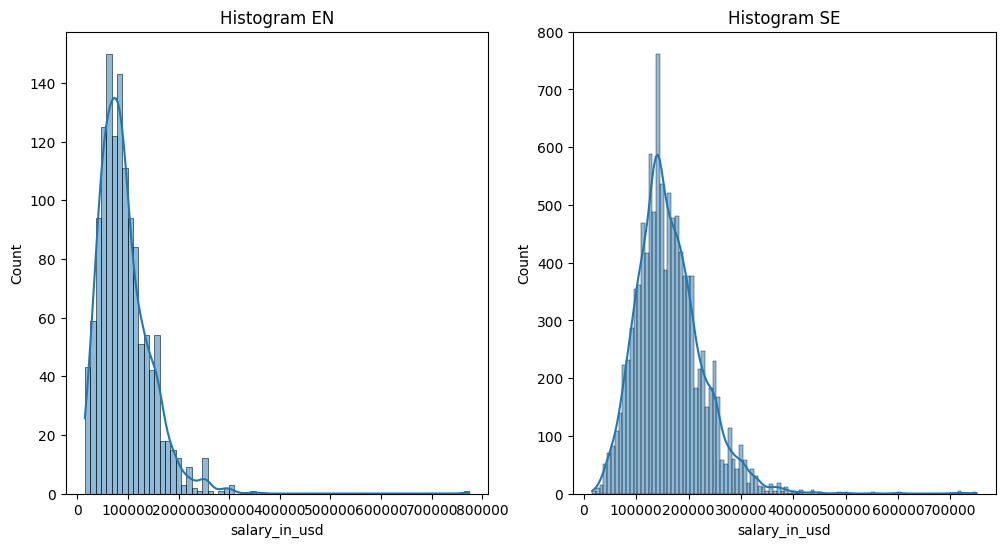

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



# Vizualizace - histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(juniorLevel, kde=True)
plt.title('Histogram EN')

plt.subplot(1, 2, 2)
sns.histplot(seniorLevel, kde=True)
plt.title('Histogram SE')
plt.show()



 Histogram celkem vypadá dobře. Takže by se ve skutečnosti mohlo jednat o normální
 rozdělení.

Také ověříme homogenitu rozptylu: Rozptyly v obou skupinách by měly být přibližně stejné.

In [ ]:
import numpy as np

varSenior = np.var(seniorLevel,ddof=1)
varJunior = np.var(juniorLevel,ddof=1)
print(f'Rozptyl SE: {varSenior}')
print(f'Rozptyl EN: {varJunior}')

Rozptyl SE: 4089398200.927969
Rozptyl EN: 2687243015.6128063


Vidíme, že rozptyly nejsou přibližně stejné, proto použijeme variantu t-testu, která nepředpokládá homogenitu rozptylu( [Welchův t-test ](https://www.geeksforgeeks.org/welchs-t-test-in-python/) ).

In [ ]:
t_stat, p_value = stats.ttest_ind(seniorLevel, juniorLevel, equal_var=False)
print(f'T-statistika: {t_stat}')
print(f'P-hodnota: {p_value}')

T-statistika: 45.938130611610134
P-hodnota: 9.45024879872106e-309


Zvolíme jako obvykle hladinu významnosti
**𝛼 =0,05**



# **Závěr:**
Vidíme, že p-hodnota je mnohem menší než
𝛼. Proto nulovou hypotézu zamítáme a docházíme k závěru, že mezi průměrnými platy dvou úrovní zkušeností existuje statisticky významný rozdíl. Vzhledem k tomu, že t-statistika = 45,94 ,  bude tento rozdíl velmi výrazný.

# **2) Vliv práce na dálku na platy (použijeme lineární regresi).**

**Nulová hypotéza (H0):** Podíl práce na dálku nemá vliv na výši platu.

**Alternativní hypotéza (H1):** Podíl práce na dálku má vliv na výši platu.


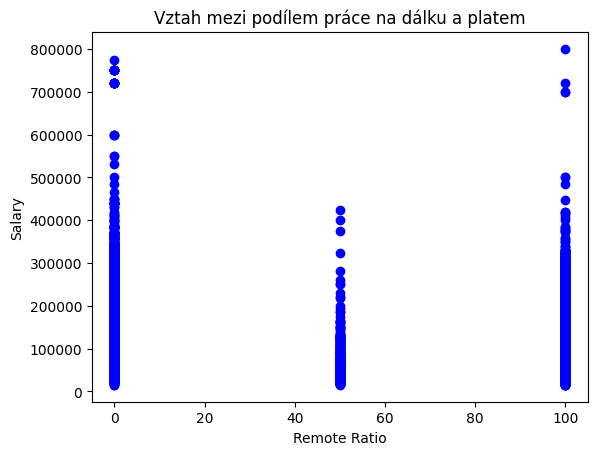

In [ ]:
# Scatter plot
plt.scatter(data['remote_ratio'], data['salary_in_usd'], color="blue")
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.title('Vztah mezi podílem práce na dálku a platem')
plt.show()

 Vytvoříme lineární regresní model, kde závislou proměnnou(Y) bude salary_in_usd a nezávislou proměnnou(X) remote_ratio

In [ ]:
import statsmodels.api as sm

# Definice nezávislé proměnné (přidání konstanty pro intercept)
X = sm.add_constant(data['remote_ratio'])


# Definice závislé proměnné
Y = data['salary_in_usd']




Vytvoříme lineární regresní model pomocí metody nejmenších čtverců, která hledá nejlepší lineární vztah mezi závislou proměnnou (Y) a nezávislými proměnnými (X). Vypočítame optimální koeficienty, které minimalizují rozdíly mezi skutečnými a předpovězenými hodnotami. Výsledkem je objekt obsahující odhadnuté parametry. [[odkaz na zdroj](https://www.statology.org/statsmodels-linear-regression-p-value/)]

In [ ]:
model = sm.OLS(Y, X).fit()

# Výstup výsledků
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     54.44
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.68e-13
Time:                        10:36:52   Log-Likelihood:            -2.0753e+05
No. Observations:               16534   AIC:                         4.151e+05
Df Residuals:                   16532   BIC:                         4.151e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.524e+05    646.863    235.603   

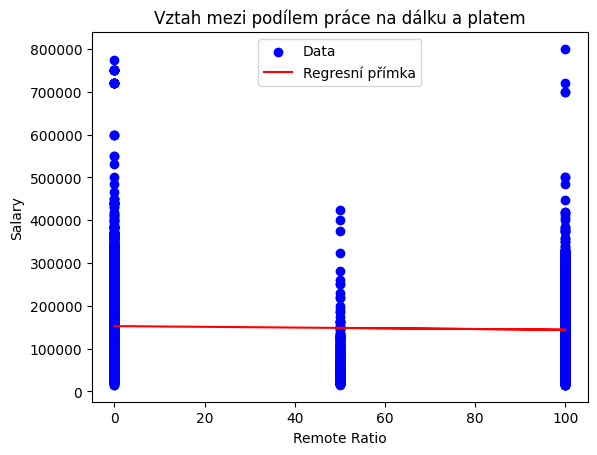

In [ ]:
# Predikce pomocí modelu
data['predicted_salary'] = model.predict(X)

# Scatter plot s regresní přímkou
plt.ylabel('Salary')
plt.xlabel("Remote Ratio")
plt.scatter(data['remote_ratio'], data['salary_in_usd'], color="blue", label='Data')
plt.plot(data['remote_ratio'], data['predicted_salary'], color='red', label='Regresní přímka')
plt.title('Vztah mezi podílem práce na dálku a platem')
plt.legend()
plt.show()

# **Závěry:**
P-hodnota je 0,000 (což je menší než 0,05), takže můžeme říci, že koeficient pro remote_ratio je statisticky významný. To znamená, že remote_ratio ovlivňuje salary_in_usd. Koeficient remote_ratio je negativní (-84.8649 ), což naznačuje, že zvyšování remote_ratio je spojeno s poklesem platu. Nicméně, když se podíváme na graf, můžeme pozorovat, že tento vliv je minimální.


# **3) Geografické rozdíly v platech. (Chi-kvadrát test)**

**Nulová hypotéza (H0):** Geografická poloha zaměstnance a společnosti nemá vliv na platy. (Platy jsou nezávislé na geografické poloze.)

**Alternativní hypotéza (H1):** Geografická poloha zaměstnance a společnosti má vliv na platy. (Platy jsou závislé na geografické poloze.)

Pro zjednodušení rozdělíme geografickou polohu společnosti na Spojené státy (US) a všechny ostatní země. Dále rozdělíme platy do tří kategorií: **small**, **medium** a **big**. Následně vytvoříme kontingenční tabulku

In [ ]:
data['region'] = data['employee_residence'].apply(lambda x: 'US' if x == 'US' else 'Všechny ostatní')

In [ ]:

bins = [0, 65000, 130000, np.inf]  # Hranice pro platové kategorie
labels = ['small', 'medium', 'big']

# Přiřadime platové kategorie
data['salary_category'] = pd.cut(data['salary_in_usd'], bins=bins, labels=labels, right=False)

In [ ]:
# Vytvořime tabulku kontingence
contingency_table = pd.crosstab(data['region'], data['salary_category'])

# Zobraz tabulku kontingence
print(contingency_table)

salary_category  small  medium   big
region                              
US                 448    4660  9359
Všechny ostatní    771     817   479


Máme tabulku kontingenčních pozorovaných hodnot. Ještě budeme potřebovat tabulku očekávaných hodnot. Pro výpočet očekávaných frekvencí je třeba zjistit součty řádků a sloupců. Očekávané frekvence se vypočítají podle vzorce:
$ E_{ij} = \frac{R_i \times C_j}{N}$
kde:
- \$( E_{i,j} \)$ je očekávaná frekvence v i-té řádce a j-tém sloupci,
- \( R_i \) je součet i-té řádky,
- \( C_j \) je součet j-tého sloupce,
- \( N \) je celkový součet všech pozorování.



In [ ]:
import numpy as np
# Součty řádků a sloupců
row_totals = contingency_table.sum(axis=1)
column_totals = contingency_table.sum(axis=0)
grand_total = contingency_table.sum().sum()

# Výpočet očekávaných frekvencí
expected = np.outer(row_totals, column_totals)
expected=expected/grand_total
print("Očekávané frekvence:")
print(expected)

Očekávané frekvence:
[[1066.60656828 4792.2921858  8608.10124592]
 [ 152.39343172  684.7078142  1229.89875408]]


Nyní můžeme vypočítat chí-kvadrát statistiku pomocí následujícího vzorce:

  $\chi^2 = \sum_{i} \frac{(O_i - E_i)^2}{E_i}$

  $O_i$ - jsou pozorované hodnoty v každé kategorii

  $E_i$ - jsou očekávané hodnoty v každé kategorii

In [ ]:
chi2_stat = ((contingency_table - expected)**2 / expected).sum().sum()

print(f"chí-kvadrát statistika :{chi2_stat}")

chí-kvadrát statistika :3423.035933971761


Stupně volnosti pro chí-kvadrát test v kontextu tabulky kontingence spočítáme následovně: (počet řádků - 1) × (počet sloupců - 1). To znamená, že nás bude zajímat druhý stupeň volnosti.

Na závěr zjistíme p-hodnotu pro $\chi^2$ = 3423,036 a 2 stupně volnosti. Pro tento účel vyhledáme tabulku chí-kvadrát(např. [chi-square distribution table](https://www.scribbr.com/wp-content/uploads/2022/05/chi-square-distribution-table.png )). Podíváme se na řádek odpovídající 2 stupňům volnosti.

Vzhledem k tomu, že hodnota  $\chi^2$
= 3423,036 je mnohem vyšší než kritické hodnoty uvedené v tabulce, p-hodnota bude velmi malá. To znamená, že můžeme zamítnout nulovou hypotézu, která tvrdí, že geografická poloha nemá vliv na platy.